# K-vecinos más próximos

## Definición y resultados asintóticos

Dada una entrada $\boldsymbol{x}$, el clasificador (por los) **$K$ vecinos más próximos** o **K nearest neighbor (KNN)** busca $K$ ejemplos o prototipos más cercanos de $\boldsymbol{x}$ en el conjunto de entrenamiento, $N_K(\boldsymbol{x},\mathcal{D})$, y toma sus etiquetas para derivar una distribución sobre las salidas en la región local alrededor de $\boldsymbol{x}$:
$$p(y=c\mid\boldsymbol{x},\mathcal{D})%
=\frac{1}{K}\sum_{n\in N_K(\boldsymbol{x},\mathcal{D})}\mathbb{I}(y_n=c)$$
Más simplemente, KNN retorna la etiqueta más votada (mayoritaria) si es única; si no, en caso de empate a votos entre dos o más clases, KNN devuelve la etiqueta del prototipo más cercano entre los prototipos de las clases empatadas.

El caso particular $K=1$ es especialmente popular; se conoce como clasificador (por el) **vecino más próximo** o **nearest neighbor (NN)** y su función predictiva es una delta:
$$p(y=c\mid\boldsymbol{x},\mathcal{D})=\delta(c,y_n)%
\quad\text{con conjunto unitario}\quad%
N_1(\boldsymbol{x},\mathcal{D})=\{n\}$$
Conviene destacar que podría no existir un único prototipo más cercano a $\boldsymbol{x}$, sino dos o más empatados a la misma distancia de $\boldsymbol{x}$. En tal caso asumimos que el desempate se decide al azar. Más generalmente, en el caso de KNN, si existen dos o más conjuntos de $K$ prototipos más cercanos a $\boldsymbol{x}$, escogemos uno de ellos al azar. Nótese que el empate a distancias no tiene nada que ver con el empate a votos. Por lo general, la probabilidad de que se produzcan empates a distancia es insignificante, no así la probabilidad de empate a votos; por eso desempatamos al azar en el caso de empates a distancia, pero no en el caso de empate a votos.

Los parámetros principales de KNN son el tamaño del entorno local, $K$, y la distancia $d(\boldsymbol{x},\boldsymbol{x}')$ con la que compara cualquier par de puntos en el espacio de representación de los datos, típicamente $\mathbb{R}^D$. Se suele usar la distancia Euclídea o, más generalmente, la de Mahalanobis:
$$d_M(\boldsymbol{x},\boldsymbol{\mu})=\sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^tM(\boldsymbol{x}-\boldsymbol{\mu})}$$
donde $M$ es una matriz definida positiva; por ejemplo, si $M$ es la identidad $M=I_D$, Mahalanobis coincide con la Euclídea.

En términos asíntóticos, esto es, cuando $N\to\infty$, el clasificador NN comete un error de clasificación no superior a dos veces el de Bayes. Más aún, el error del clasificador KNN converge al de Bayes si $K$ se escoge tal que $K\to\infty$ y $K/N\to 0$; esto se cumple, por ejemplo, tomando $K=\sqrt{N}$.

## Ejemplo

En un problema de clasificación en dos clases, $y\in\{0,1\}$, 5NN para un punto de test $\boldsymbol{x}$ halla $3$ vecinos de la clase $1$ y $2$ de la clase $0$. En este caso, 5NN estima la probabilidad de que $\boldsymbol{x}$ pertenezca a la clase $1$ como:
$$p(y=1\mid\boldsymbol{x},\mathcal{D})=\frac{3}{5}=0.6$$

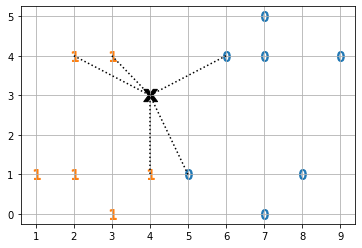

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.neighbors import NearestNeighbors

X0 = np.array(([5, 1], [6, 4], [7, 0], [7, 4], [7, 5], [8, 1], [9, 4]), dtype=float)
X1 = np.array(([1, 1], [2, 1], [2, 4], [3, 0], [3, 4], [4, 1]), dtype=float)
N0 = X0.shape[0]; N1 = X1.shape[0]
X = np.vstack((X0, X1))
y = np.vstack((np.zeros((N0, 1)), np.ones((N1, 1))))
x = np.array(([4, 3])) # <<< test
fig, ax = plt.subplots()
ax.grid(); ax.scatter(*x, c='k', marker=r'$\mathbf{x}$', s=200)
ax.scatter(*X0.T, marker=r'$0$', s=100)
ax.scatter(*X1.T, marker=r'$1$', s=100)
K = 5 # <<< número de vecinos
KNN = NearestNeighbors(n_neighbors=K).fit(X)
_, KNN_ind = KNN.kneighbors([x])
lines = np.zeros((K, 2, 2))
lines[:, 0, :] = np.squeeze(X[KNN_ind, :])
lines[:, 1, :] = np.repeat([x], K, axis=0)
ax.add_collection(LineCollection(lines, colors='black', linestyle='dotted'));

## Diagrama de Voronoi

El clasificador NN induce una partición del espacio de representación en una región $V(\boldsymbol{x}_n)$ por cada dato $\boldsymbol{x}_n$ tal que todos los puntos en $V(\boldsymbol{x}_n)$ están más cerca de $\boldsymbol{x}_n$ que de cualquier otro dato. En el plano, esta partición se conoce como **diagrama de Voronoi** y cada región de la partición se denomina **celda de Voronoi.**

**Ejemplo:**

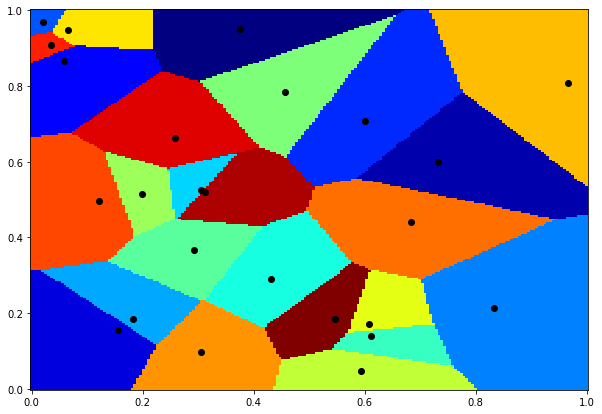

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree, Voronoi
np.random.seed(42)
data = np.random.rand(25, 2)
fig, ax = plt.subplots(figsize=(10,7))
#voronoi_plot_2d(vor, ax=ax, show_vertices=False)
xlim = plt.xlim(); ylim = plt.ylim()
tree = KDTree(data)
x = np.linspace(xlim[0], xlim[1], 200)
y = np.linspace(ylim[0], ylim[1], 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]
plt.plot(data[:, 0], data[:, 1], 'ko')
plt.pcolormesh(x, y, tree.query(xy)[1].reshape(200, 200), cmap='jet');

## $K$ como hiperparámetro de regularización

Por lo general, el clasificador KNN obtiene buenos resultados con un valor de $K$ reducido. No obstante, $K$ puede interpretarse como un hiperparámetro de regularización con el que optimizar el grado de ajuste a los datos. Si $K$ es muy pequeño, el modelo tenderá a sobre-ajustarse a los datos mientras que, si $K$ es muy grande, se aproximará a las probabilidades a priori de las clases.

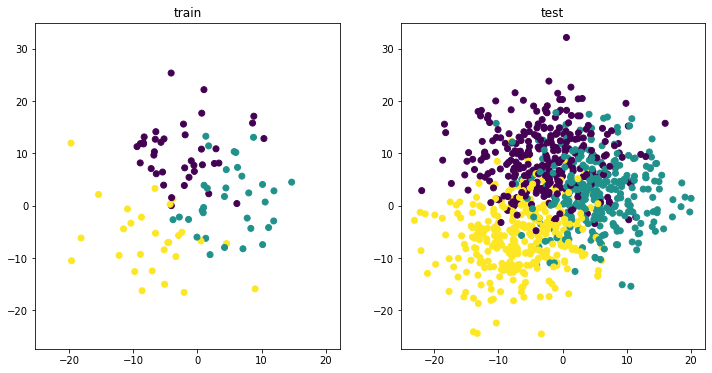

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100; x_train = X[:ntrain]; y_train = y[:ntrain];  x_test = X[ntrain:]; y_test = y[ntrain:]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax=axes[1]; ax.set_title('test'); ax.scatter(*x_test.T, c=y_test)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
ax=axes[0]; ax.set_title('train'); ax.scatter(*x_train.T, c=y_train)
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);

/tmp/ipykernel_55563/2861557308.py:14: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz.reshape(xx.shape), 2, colors='orange', linestyles='solid')


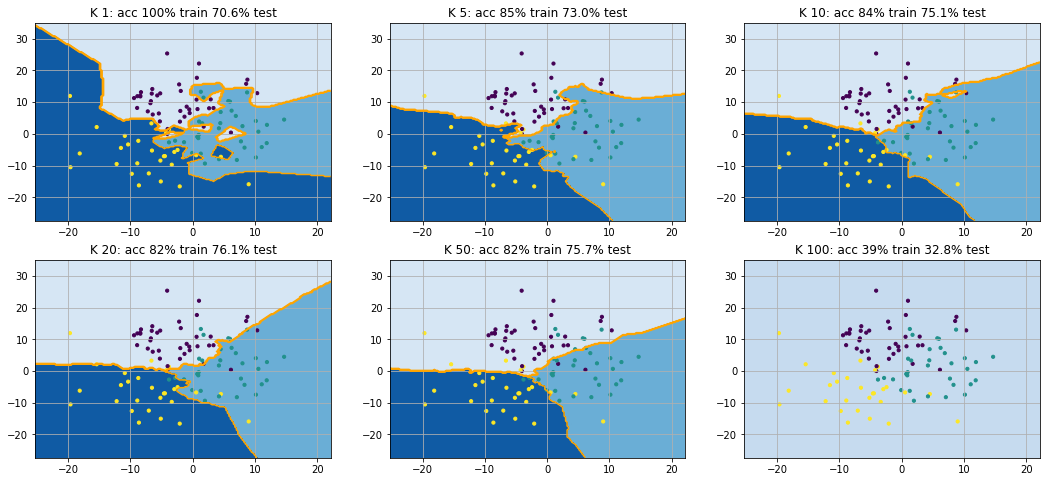

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

Ks = [1, 5, 10, 20, 50, ntrain]; nrows = 2; ncols = 3; n_Ks = len(Ks)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 8))
for i, K in enumerate(Ks):
    ax = axes.flat[i]
    clf = KNN(n_neighbors=K).fit(x_train, y_train)
    acc_train = accuracy_score(y_train, clf.predict(x_train))
    acc_test = accuracy_score(y_test, clf.predict(x_test))
    ax.grid(); ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=200), np.linspace(y_min, y_max, num=200))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ax.contour(xx, yy, zz.reshape(xx.shape), 2, colors='orange', linestyles='solid')
    ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues'); ax.scatter(*x_train.T, c=y_train, s=10)
    ax.set_title('K {}: acc {:.0%} train {:.1%} test'.format(K, acc_train, acc_test))

## The curse of dimensionality

La **maldición de la dimensionalidad** es una expresión bien conocida para referirse al hecho de que, por lo general, muchas técnicas clásicas como el clasificador KNN empeoran sensiblemente con entradas de alta dimensión. En el caso del clasificador KNN se explica fácilmente ya que, al aumentar la dimensión, las distancias se igualan y el NN se halla en un entorno cada vez menos local.

El fenómeno por el cual las distancias se igualan en altas dimensiones se conoce como **concentración de distancias.** Consideremos $N$ datos uniformemente distribuidos en una bola unitaria $D$-dimensional centrada en el origen (donde asumimos que se halla la muestra de test). Como se puede comprobar en la [solución al ejercicio 2.3 de HTF09](https://waxworksmath.com/Authors/G_M/Hastie/WriteUp/Weatherwax_Epstein_Hastie_Solution_Manual.pdf), la distancia mediana del origen a su vecino más cercano es:
$$d(D,N)=\left(1-\left(\frac{1}{2}\right)^{1/N}\right)^{1/D}$$
Para $N=500$ y $D=10$, $d(D,N)\approx 0.52$, esto es, más de la mitad de la distancia a la frontera. En general, el vecino más cercano se aproxima a la frontera de la bola en altas dimensiones, donde también se hallarán el resto de datos a distancia (prácticamente) unitaria.

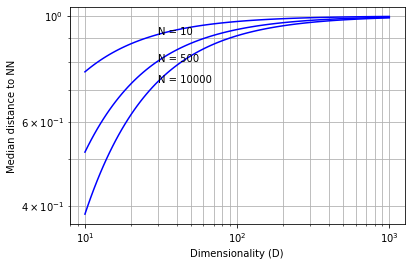

In [5]:
import numpy as np
import matplotlib.pyplot as plt
D = np.logspace(1, 3, 100)
plt.xscale('log', base=10); plt.yscale('log', base=10); plt.grid(which='both')
for N in [10, 500, 10000]:
  d = ( 1 - .5 ** (1 / N) ) ** (1 / D)
  plt.plot(D, d, 'b-')
  plt.text(30, ( 1 - .5 ** (1 / N) ) ** (1 / 30), 'N = %d' % N)
  plt.xlabel('Dimensionality (D)')
  plt.ylabel('Median distance to NN')

En relación con la pérdida de localidad del entorno al aumentar la dimensión, supongamos que los datos se distribuyen uniformemente en un hipercubo unitario $D$-dimensional. Asimismo, consideremos un entorno hipercúbico centrado en la muestra de test que capture una fracción $r$ de los datos. Dado que una fracción $r$ de los datos corresponde a una fracción $r$ del volumen unitario, la longitud esperada del lado del entorno será $e_D(r)=r^{1/D}$. Por ejemplo, $e_{10}(0.01)=0.63$ y $e_{10}(0.1)=0.80$. Luego, para capturar el $1\%$ o $10\%$ de los datos y hallar un promedio local, debemos cubrir el $63\%$ o $80\%$ del rango de cada variable de entrada. En definitiva, tenemos que considerar entornos que, con el aumento de la dimensión, son cada vez menos locales.

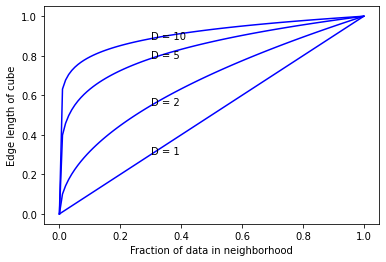

In [6]:
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0, 1, 100)
for D in [1, 2, 5, 10]:
  e = r ** (1 / D)
  plt.plot(r, e, 'b-')
  plt.text(0.3, 0.3 ** (1 / D), 'D = %d' % D)
  plt.xlabel('Fraction of data in neighborhood')
  plt.ylabel('Edge length of cube')

## Reducción del coste computacional

Los clasificadores KNN se caracterizan por un elevado coste computacional, tanto espacial como temporal, debido al mantenimiento de (todos) los datos de entrenamiento en inferencia. Con el fin de reducir el coste espacial, se han propuesto diversas técnicas que, en esencia, eliminan prototipos (datos de entrenamiento) que no afectan a las fronteras de decisión. Por otro lado, para atacar el coste temporal, se han desarrollado numerosas técnicas de búsqueda eficiente de K vecinos, exacta y aproximada (para $D>10$), entre las que podemos destacar:
* **K-d tree:** divide el espacio en regiones de lados paralelos a los ejes, o con algún método de clustering basado en puntos ancla.
* **Locality sensitive hashing (LSH):** técnica popular de 1999; más recientemente se aprende la función de hashing.

Una librería popular para la búsqueda eficiente de vecinos es [**FAISS.**](https://github.com/facebookresearch/faiss)

## Reconocimiento (de conjunto) abierto

Llamamos **closed world assumption** a la asunción tı́pica según la cual el conjunto de clases en un problema de clasificación se halla prefijado. Sin embargo, muchos problemas de interés requieren que dicho conjunto pueda ampliarse con muestras de test provinientes de nuevas categorías. Los clasificadores KNN pueden adaptarse con relativa facilidad a este tipo de problemas que,
en oposición a la asunción típica, denominamos de **open set recognition**. Algunas tareas de interés que pueden verse como problemas de reconocimiento (de conjunto) abierto son:
* **Novelty detection:** el sistema detecta que la muestra de test es de una clase no vista antes; por ejemplo una cara desconocida
* **Incremental learning, online learning, life-long learning o continual learning:** si el sistema detecta una nueva clase con éxito, pregunta por el id de la nueva clase y la añade a las existentes
* **Out-of-distribution (OOD) detection:** se detecta que la muestra de test no es de clase conocida ni desconocida, sino que procede de una distribución enteramente distinta; p.e., una foto sin cara
* **Few-shot classification:** tenemos pocos ejemplos (tal vez uno solo) de cada clase; caso muy adecuado para KNN y tı́pico en online
* **Person re-identification o face verification:** se comprueba si la persona o cara de test es, con seguridad, de clase conocida
* **Entity resolution o linking:** se trata de determinar si cadenas diferentes (p.e. "John Smith" y "Jon Smith") se refieren a la misma entidad o no
* **Multi-object tracking:** cuando un sistema de radar detecta un nuevo "blip", debe decidir si se trata de un objeto ya en seguimiento o un nuevo objeto que ha entrado en el espacio aéreo